Data Science Pipeline on Coronavirus statistics up until May 12th, 2020
This is a tutorial walking users through the entire data science pipeline: data curation, parsing, management, exploratory data analysis; hypothesis testing and machine learning. Analyzing the results and presenting them in a way that can provide inferences and predictions about the data collected.

<b> Presented by: Loc Cao, Ethan Tran </b>

The dataset that we have chosen to analyze is a COVID19 dataset maintained by Our World In Data, which can be found here:
https://ourworldindata.org/coronavirus-source-data

<b> This tutorial will be split into 3 sections: </b>
##### 1. Data Curation, parsing, and management
##### 2. Exploratory Data Analysis (EDA)
##### 3. Hypothesis and Machine Learning / Analysis

#### Section 1 - Data Curating, parsing and management

Data curating, parsing and management is the initial step in the data science process. Sometimes we may acquire data that is not well-formatted or incomplete. This data is not considered 'tidy' and the process of morhping the data into something that is organized is called tidying.

In [524]:
import pandas as pd

In [525]:
df = pd.read_csv('data/owid-covid-data.csv')
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


Many of the countries in this data set are missing essential statistics on Coronavirus, this may be due to a lack of information or underreporting. Whatever the reason, categories that are missing significant entries (NaNs) are dropped from the dataset because they will not be able to provide any significant insights on the dataset.

In [526]:
import datetime
df.drop(['total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
         'tests_units', 'handwashing_facilities', 'total_cases_per_million',
         'total_deaths_per_million', 'new_cases_per_million', 'new_deaths_per_million'], axis=1, inplace = True)
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN


Additionally, the last few entries contained ambiguous values, that are not described in the website and contain 0's or NaNs for every attribute in the dataset. So we removed those too.

In [527]:
df = df.iloc[:16737]
df['date'] = df['date'].astype('datetime64[ns]') 
df

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,OWID_WRL,World,2020-05-08,3809238,94422,269249,5748,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,2.705
16733,OWID_WRL,World,2020-05-09,3899355,90117,274517,5268,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,2.705
16734,OWID_WRL,World,2020-05-10,3986907,87552,278957,4440,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,2.705
16735,OWID_WRL,World,2020-05-11,4066549,79642,282367,3410,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,2.705


The final tidy dataset contains 16737 entries and 23 attributes. However, it must be noted that some of the attributes will not be analyzed in this tutorial but are kept because they are mostly complete and could be of use for a separate analysis later.

#### Section 2 - Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the step that centers around analyzing data focused on certain characteristics. These characteristics may be the main characteristics that would be most useful depending on the dataset (e.g: Deaths in a war, Unemployment during recession), or whatever is of interest to you. 
<br>
<br>
For this tutorial, we will analyze the growth of coronavirus cases in the provided locations over time. Since there are over 160 countries analyzed over the course of varying amounts of months, we will only take data from within the last 3 months from today (February 12th, 2020 - May 12th, 2020). As well as analyzing a few major countries per continent (including Middle East separately). 

In [528]:
# Taking 4 Countries from South America, (only 3) North America, Europe, Asia, Africa, Middle East (in that order)
qdf = df.loc[(df['location'] == 'Argentina') | (df['location'] == 'Brazil') | (df['location'] == 'Columbia') |
            (df['location'] == 'United States') | (df['location'] == 'Canada') | (df['location'] == 'Mexico') |
            (df['location'] == 'Germany') | (df['location'] == 'United Kingdom') | (df['location'] == 'Italy') |
            (df['location'] == 'Spain') | (df['location'] == 'China') | (df['location'] == 'South Korea') | 
            (df['location'] == 'Indonesia') | (df['location'] == 'Japan') | (df['location'] == 'Angola') | 
            (df['location'] == 'Sudan') | (df['location'] == 'South Africa') | (df['location'] == 'Morocco') |
            (df['location'] == 'United Arab Emirates') | (df['location'] == 'Saudi Arabia') | 
            (df['location'] == 'Israel') | (df['location'] == 'Turkey') | (df['location'] == 'Uruguay')]

# Cutoff date
cutoff ='2-12-2020'
qdf = qdf[qdf['date'] >= cutoff]

Here we will plot the data:

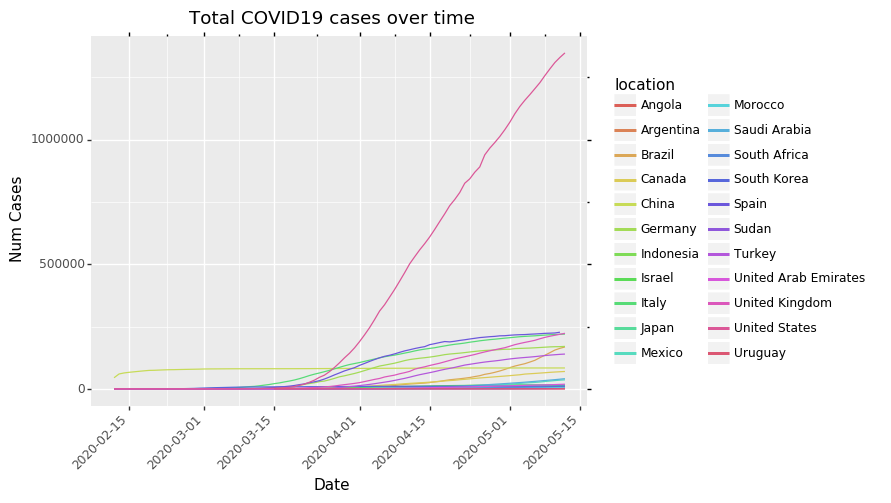

<ggplot: (-9223371891428963556)>

In [529]:
import matplotlib.pylab as plt
import numpy as np
(ggplot(qdf, aes(x='date', y='total_cases', color='location')) + 
     geom_line() +
     labs(title = "Total COVID19 cases over time",
          x="Date",
          y="Num Cases") +
     theme(axis_text_x = element_text(angle = 45, hjust = 1)))

We can clearly see a large disparity between the number of coronavirus cases in the United States and the other countries picked in the dataset.

Here we will label the entries with a continent attribute and graph the amount of COVID19 deaths 

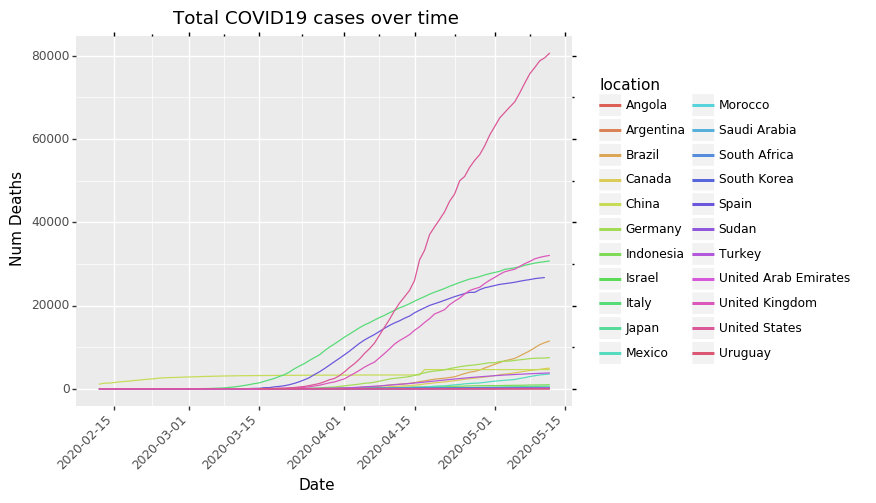

<ggplot: (-9223371891443460540)>

In [530]:
qdf['continent'] = ""
qdf.loc[qdf.location == 'Argentina', 'continent'] = "South America"
qdf.loc[qdf.location == 'Brazil', 'continent'] = "South America"
qdf.loc[qdf.location == 'Columbia', 'continent'] = "South America"
qdf.loc[qdf.location == 'Uruguay', 'continent'] = "South America"
#
qdf.loc[qdf.location == 'Angola', 'continent'] = "Africa"
qdf.loc[qdf.location == 'South Africa', 'continent'] = "Africa"
qdf.loc[qdf.location == 'Sudan', 'continent'] = "Africa"
qdf.loc[qdf.location == 'Morocco', 'continent'] = "Africa"
#
qdf.loc[qdf.location == 'United States', 'continent'] = "North America"
qdf.loc[qdf.location == 'Mexico', 'continent'] = "North America"
qdf.loc[qdf.location == 'Canada', 'continent'] = "North America"
#
qdf.loc[qdf.location == 'China', 'continent'] = "Asia"
qdf.loc[qdf.location == 'South Korea', 'continent'] = "Asia"
qdf.loc[qdf.location == 'Japan', 'continent'] = "Asia"
qdf.loc[qdf.location == 'Indonesia', 'continent'] = "Asia"
#
qdf.loc[qdf.location == 'Turkey', 'continent'] = "Middle East"
qdf.loc[qdf.location == 'Israel Korea', 'continent'] = "Middle East"
qdf.loc[qdf.location == 'United Arab Emirates', 'continent'] = "Middle East"
qdf.loc[qdf.location == 'Saudi Arabia', 'continent'] = "Middle East"

(ggplot(qdf, aes(x='date', y='total_deaths', color='location')) + 
     geom_line() +
     labs(title = "Total COVID19 cases over time",
          x="Date",
          y="Num Deaths") +
     theme(axis_text_x = element_text(angle = 45, hjust = 1)))

This graph follows a similar form of the previous, where the United States has the most coronavirus deaths by a large margin, this could indicate a correlation between the two attributes.

Lets see how various attribute totals change overtime, specifically we will look at the aggregate number of new cases (orange) to new deaths (blue) per day.

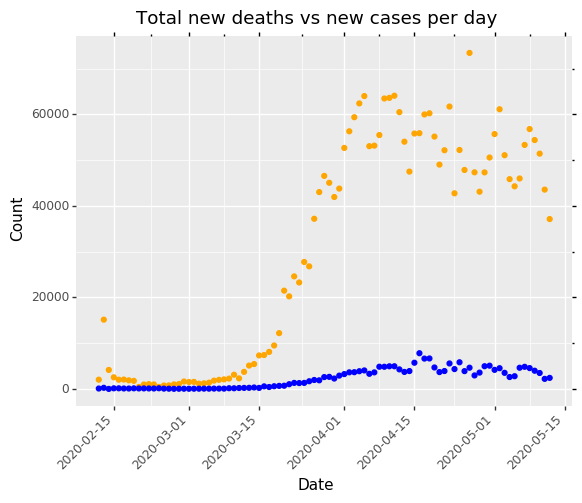

<ggplot: (-9223371891450128888)>

In [531]:
plt.style.use('classic')
df_news = qdf.groupby(['location', 'date'], as_index = False).aggregate(
    {'total_cases':np.sum,'new_cases':np.sum, 
     'total_deaths':np.sum, 'new_deaths':np.sum})
total_daily_cases = df_news.groupby('date')['new_cases'].sum()
total_daily_deaths = df_news.groupby('date')['new_deaths'].sum()

agg_df = pd.concat([total_daily_cases, total_daily_deaths], axis = 1, ignore_index = True, levels = 0)
agg_df.columns = {'Total_new_deaths', 'Total_new_cases'}
agg_df
plot = (ggplot(agg_df.reset_index(), aes(x = 'date')) 
    + geom_point(aes(y = 'Total_new_cases'), color = 'orange', show_legend=True) 
    + geom_point(aes(y = 'Total_new_deaths'), color = 'blue', show_legend=True)
    +  labs(title = "Total new deaths vs new cases per day",
          x="Date",
          y="Count")
    + theme(axis_text_x = element_text(angle = 45, hjust = 1)) )
plot

We should also standardize the amount of coronavirus cases, deaths, etc based on population. This will give allow us to get a fairer observation of how coronavirus is affecting countries per every million.

In [532]:
cpy_qdf = qdf.copy()
cpy_qdf['std_tot_cases'] = ""
cpy_qdf['pop_mills'] = ""
cpy_qdf['std_tot_deaths'] = ""
def standardize_rona(df) :
    for idx, row in df.iterrows():
        pop = row['population']/1000000
        pct = (row['total_cases'] / pop)
        df.loc[idx,'std_tot_cases'] = pct
        npct = (row['total_deaths'] / pop)
        df.loc[idx,'std_tot_deaths'] = npct
        df.loc[idx,'pop_mills'] = pop
        
standardize_rona(cpy_qdf)
cpy_qdf[400:410]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,median_age,...,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_100k,continent,std_tot_cases,pop_mills,std_tot_deaths
2985,CHN,China,2020-02-26,78159,410,2717,52,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,54.3026,1439.32,1.88769
2986,CHN,China,2020-02-27,78598,439,2746,29,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,54.6076,1439.32,1.90784
2987,CHN,China,2020-02-28,78927,329,2790,44,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,54.8362,1439.32,1.93841
2988,CHN,China,2020-02-29,79355,428,2837,47,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,55.1335,1439.32,1.97106
2989,CHN,China,2020-03-01,79929,574,2872,35,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,55.5323,1439.32,1.99538
2990,CHN,China,2020-03-02,80134,205,2914,42,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,55.6748,1439.32,2.02456
2991,CHN,China,2020-03-03,80261,127,2946,32,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,55.763,1439.32,2.04679
2992,CHN,China,2020-03-04,80380,119,2983,37,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,55.8457,1439.32,2.0725
2993,CHN,China,2020-03-05,80497,117,3014,31,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,55.927,1439.32,2.09404
2994,CHN,China,2020-03-06,80667,170,3044,30,1.439324e+09,147.674,38.7,...,0.7,261.899,9.74,1.9,48.4,4.34,Asia,56.0451,1439.32,2.11488


We can now replot the number of total coronavirus cases as we did on the first plot, but based on population size.

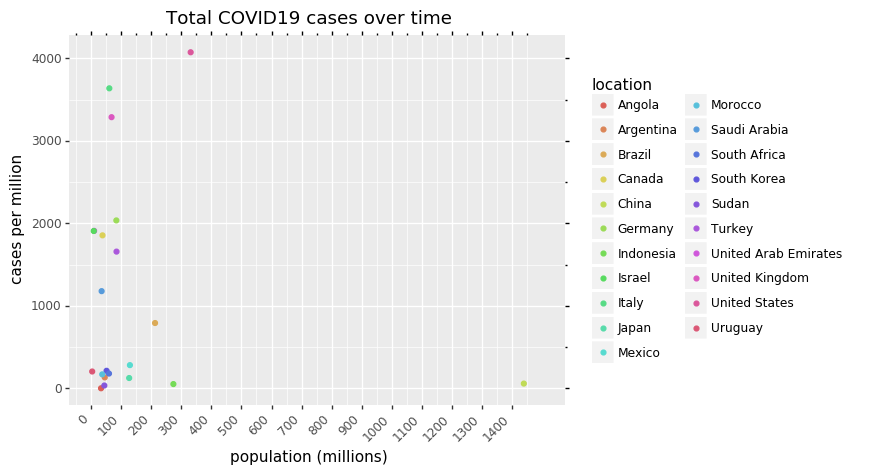

<ggplot: (-9223371891445083988)>

In [533]:
cpy_qdf['std_tot_cases'] = pd.to_numeric(cpy_qdf['std_tot_cases'])
cpy_qdf['std_tot_deaths'] = pd.to_numeric(cpy_qdf['std_tot_deaths'])
cpy_qdf['pop_mills'] = pd.to_numeric(cpy_qdf['pop_mills'])
tot_end = cpy_qdf.copy()
tot_end = tot_end.loc[tot_end['date'] == '2020-05-12']
tot_end = tot_end.reset_index()
(ggplot(tot_end, aes(x= 'pop_mills', y='std_tot_cases', color='location')) + 
     geom_point() +
     labs(title = "Total COVID19 cases over time",
          x="population (millions)",
          y="cases per million") +
     theme(axis_text_x = element_text(angle = 45, hjust = 1)) +
     scale_x_continuous(breaks = range(0, 1500, 100), limits=(0,1500)))

Even with data standardized on population, we can still see that the United States has the highest number of cases. Strangely enough, we see that China has an low standardized number of cases, despite being one of the most populated and dense countries in the world. There are many inferences we can make off this newly standardized data.

#### Section 3 - Hypothesis Testing & Machine Learning + Analysis

In [534]:
#TODO